In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)
import numpy
from math import sqrt
from statsmodels.tsa.arima_model import ARIMAResults

In [2]:
# delhi.csv have data from 24-12-17 to 21-08-18(for the training)
delhi = pd.read_csv('delhi.csv', header = None, parse_dates=[[0,1]], infer_datetime_format=True)
delhi.columns = ['datetime', 'load']
delhi.index = delhi['datetime']
delhi = delhi.drop(columns = ['datetime'])

In [143]:
# delhi2.csv have data from 01-08-18 to 27-09-18 (for the testing)
df = pd.read_csv('delhi2.csv', header=None, names=['date', 'time', 'load'])
df.index = pd.to_datetime(df['date'] + ':' + df['time'], format='%d/%m/%Y:%H:%M')
df = df.drop(columns = ['date', 'time'])

In [144]:
df.head()

,load
2018-08-01 00:00:00,4822.88
2018-08-01 00:05:00,4782.05
2018-08-01 00:10:00,4757.48
2018-08-01 00:15:00,4672.03
2018-08-01 00:20:00,4645.93


In [147]:
delhi.head()

,load
datetime,
2017-12-24 00:00:00,1793.03
2017-12-24 00:05:00,1781.27
2017-12-24 00:10:00,1757.10
2017-12-24 00:15:00,1730.53
2017-12-24 00:20:00,1716.35


In [58]:
delhi2 = pd.read_csv('delhi2.csv', header = None, parse_dates=[[0, 1]], infer_datetime_format=True)
delhi2.columns = ['datetime', 'load']
delhi2.index = delhi2['datetime']
delhi2 = delhi2.drop(columns = ['datetime'])
# delhi2 = delhi2.asfreq(freq='30T', method='bfill')

In [150]:
df = df.asfreq(freq='30T')

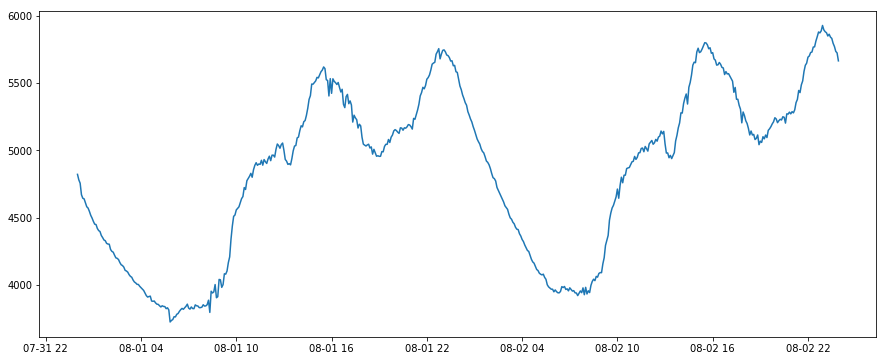

In [146]:
plt.plot(df['2018-08-01':'2018-08-02'])
plt.show()

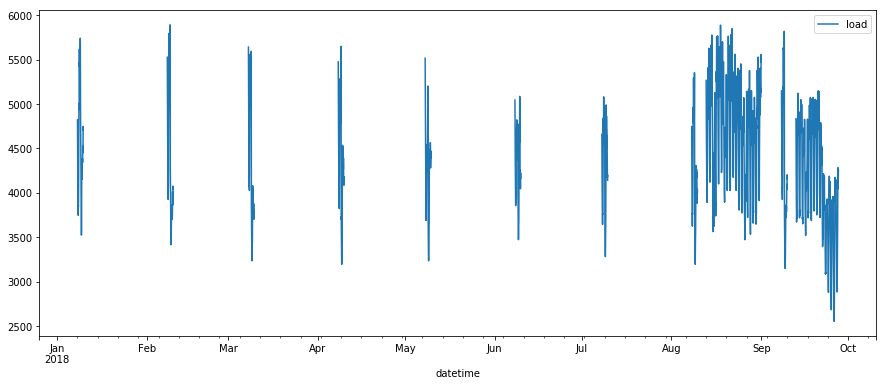

In [52]:
delhi2.plot()

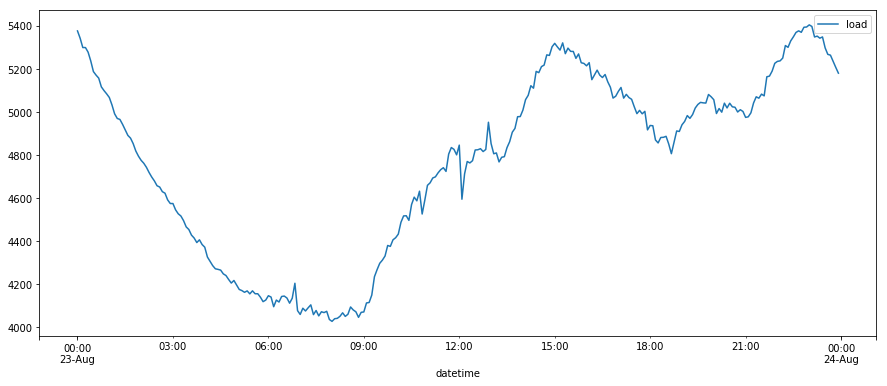

In [21]:
delhi2['2018-08-23'].plot()

In [3]:
loaded = ARIMAResults.load('30_model.pkl')

[]

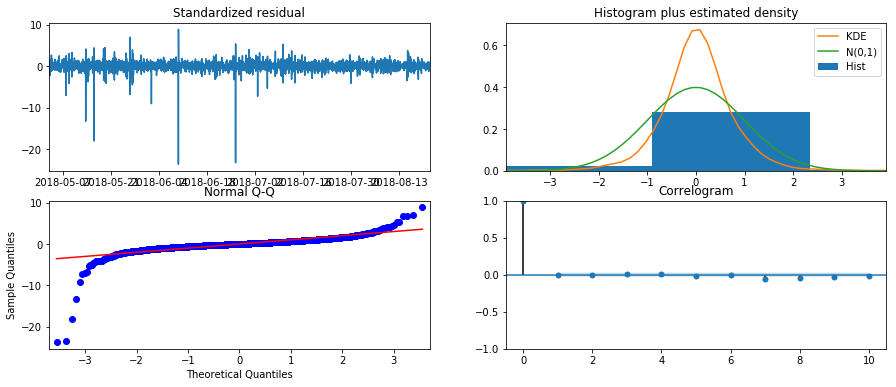

In [4]:
plt.rcParams['figure.figsize'] = (15, 6)
loaded.plot_diagnostics()
plt.plot()

In [5]:
%%time
forecast = loaded.forecast(steps=48*60)

CPU times: user 5h 15min 26s, sys: 39min 48s, total: 5h 55min 15s
Wall time: 13min 23s


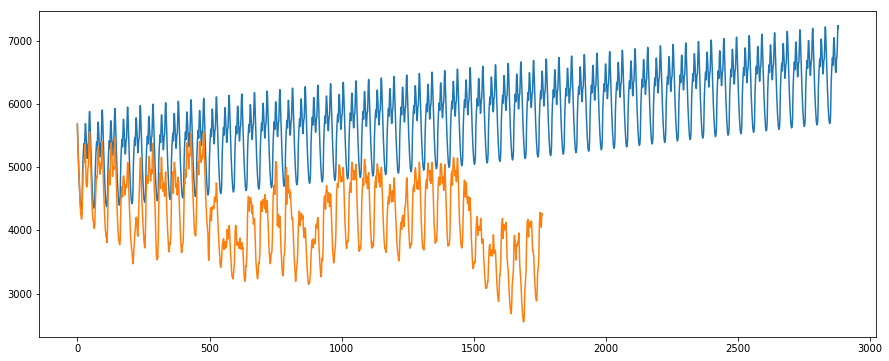

In [151]:
# forecast.plot()
plt.plot(forecast.values)
plt.plot(df['2018-08-22':].values)

In [46]:
delhi2['2018-08-22':].isna().sum()

load    0
dtype: int64

In [40]:
len(forecast.values), len(delhi2['2018-08-22':].values)

(2880, 1760)

In [9]:
forecast.head()

2018-08-22 00:00:00    5671.338185
2018-08-22 00:30:00    5488.919805
2018-08-22 01:00:00    5348.396079
2018-08-22 01:30:00    5221.257681
2018-08-22 02:00:00    5101.604418
Freq: 30T, dtype: float64

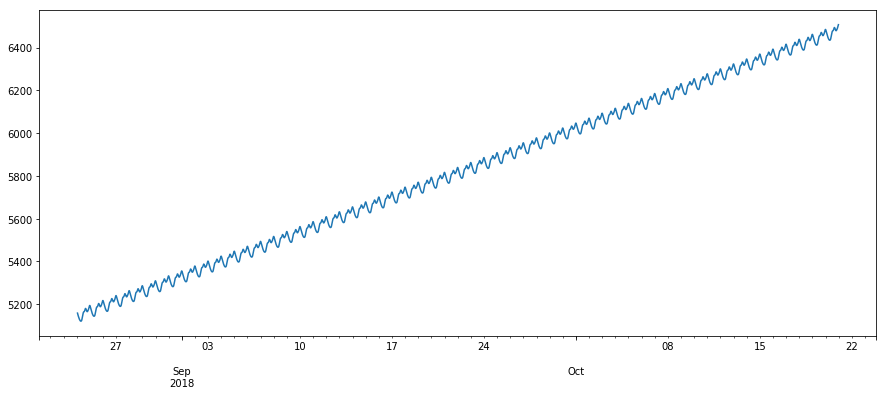

In [14]:
forecast.rolling(window=100).mean().plot()

In [7]:
d = pd.read_csv('22-08-2018.csv', header = None, parse_dates=[[0]], infer_datetime_format=True)
d.columns = ['datetime','load' ]
d.index = d['datetime']
d = d.drop(columns = ['datetime'])
actual_22 = d.asfreq(freq='30T', method='bfill')

In [8]:
d = pd.read_csv('23-08-2018.csv', header = None, parse_dates=[[0]], infer_datetime_format=True)
d.columns = ['datetime','load' ]
d.index = d['datetime']
d = d.drop(columns = ['datetime'])
actual_23 = d.asfreq(freq='30T', method='bfill')

In [9]:
d = pd.read_csv('24-08-2018.csv', header = None, parse_dates=[[0]], infer_datetime_format=True)
d.columns = ['datetime','load' ]
d.index = d['datetime']
d = d.drop(columns = ['datetime'])
actual_24 = d.asfreq(freq='30T', method='bfill')

In [10]:
d = pd.read_csv('25-08-2018.csv', header = None, parse_dates=[[0]], infer_datetime_format=True)
d.columns = ['datetime','load' ]
d.index = d['datetime']
d = d.drop(columns = ['datetime'])
actual_25 = d.asfreq(freq='30T', method='bfill')

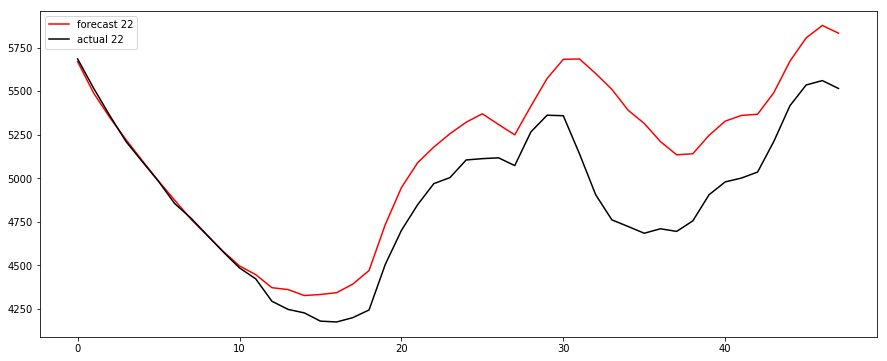

In [11]:
plt.plot(forecast[48*0:48*1].values, color='red', label='forecast 22')
plt.plot(actual_22.values, color='black', label='actual 22')
# plt.plot(delhi['2018-08-21'].values, color='yellow')
# plt.plot(delhi['2018-08-20'].values, color='blue')
plt.legend()

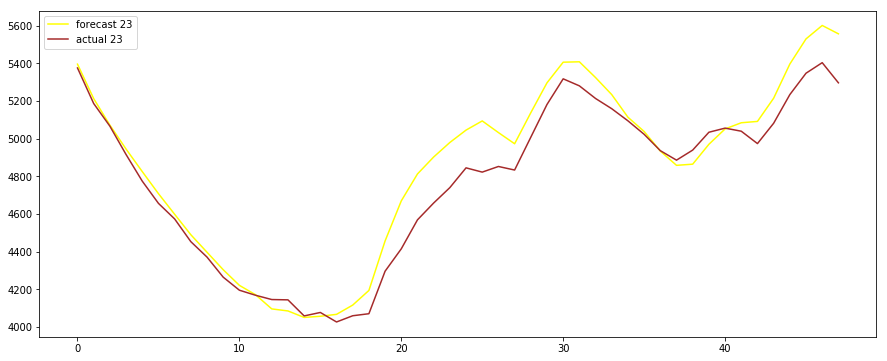

In [12]:
plt.plot(forecast[48*1:48*2].values -300, color='yellow', label='forecast 23')
plt.plot(actual_23.values, color='brown', label='actual 23')
plt.legend()

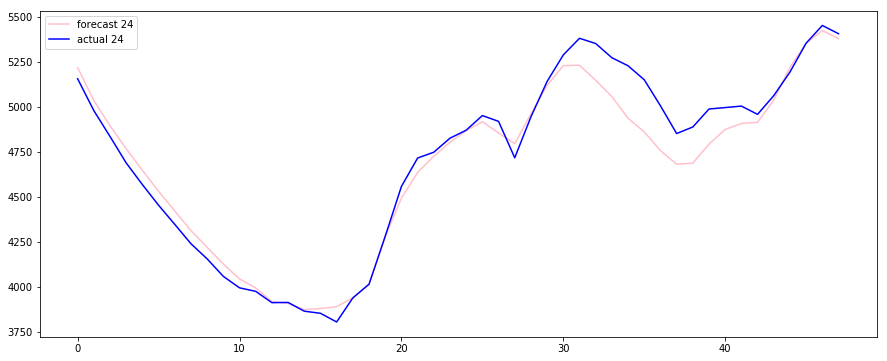

In [13]:
plt.plot(forecast[48*2:48*3].values-500, color='pink', label='forecast 24')
plt.plot(actual_24.values, color='blue', label='actual 24')
plt.legend()

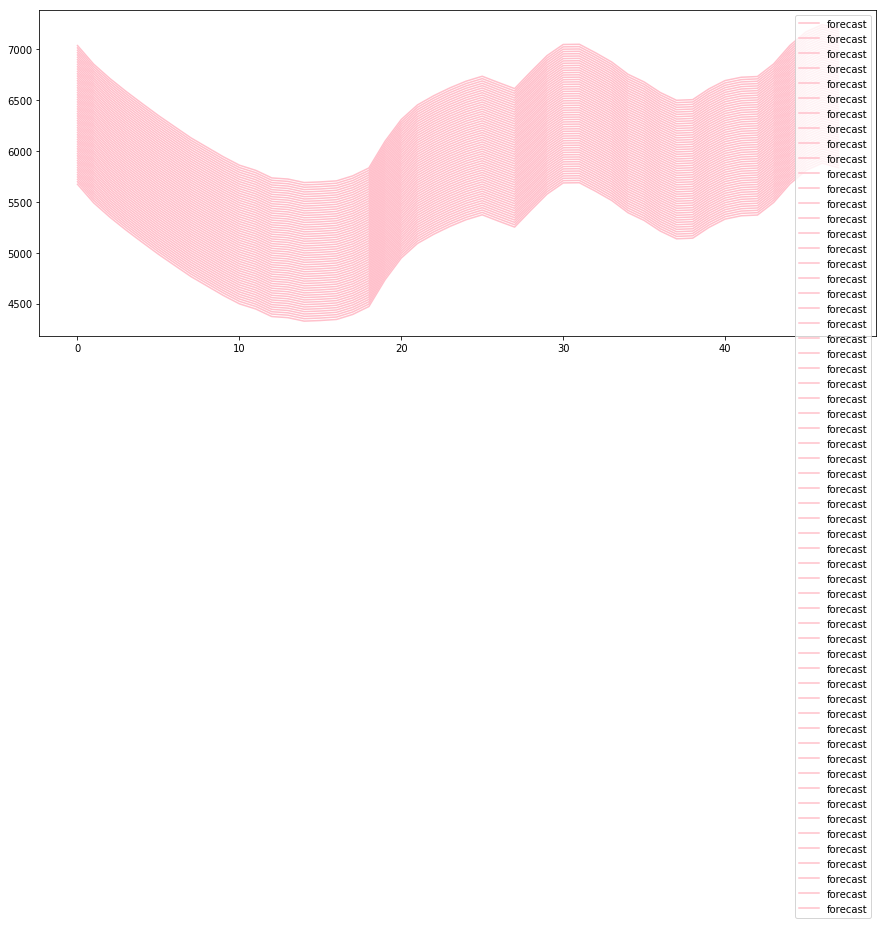

In [19]:
# plt.plot(forecast[48*0:48*1].values-500, color='pink', label='forecast 24')
# plt.plot(forecast[48*1:48*2].values-500, color='orange', label='forecast 24')
# plt.plot(forecast[48*2:48*3].values-500, color='black', label='forecast 24')
# plt.plot(forecast[48*3:48*4].values-500, color='red', label='forecast 24')
# plt.plot(forecast[48*4:48*5].values-500, color='pink', label='forecast 24')
# plt.plot(forecast[48*5:48*6].values-500, color='pink', label='forecast 24')
# plt.plot(forecast[48*6:48*7].values-500, color='pink', label='forecast 24')
# plt.plot(forecast[48*7:48*8].values-500, color='pink', label='forecast 24')
for i in range(60):
    plt.plot(forecast[48*i:48*(i+1)].values, color='pink', label='forecast')
plt.legend()